In [193]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração da máquina (MacBook Pro M3 2023)
* Host: MacBook Pro M3 2023
* Sistema Operacional: macOS Sonoma 14.7.1
* Processador: Apple M3 Pro
* Quantidade total de núcleos: 12
* Quantidade total de threads: 12


# Informações sobre os dados na tabela

* Quantidade de processos (Em que 0 signfica sequencial)
* Quantidade de pontos: número de linhas/instâncias do dataset
* Tempo de processamento: tempo em segundos que levou o processamento

In [194]:
# README: Atualize os valores abaixo com a quantidade de clusters e de atributos que usou para gerar o arquivo de log
n_clusters=3
n_attributes=4

In [195]:
# Carrega o arquivo com tempos de execução baseado nos dados informados na célula anterior
nomes_das_colunas = ['Quantidade de Processos', 'Quantidade de Pontos', "Tempo de Processamento"]
caminho_arquivo_logs = f"./log_execucao_kmeans_{n_clusters}_clusters_{n_attributes}_attributes.csv" #Caminho do arquivo de logs
df = pd.read_csv(caminho_arquivo_logs, header=None, names=nomes_das_colunas)
df

,Quantidade de Processos,Quantidade de Pontos,Tempo de Processamento
0,0,500,0.02077
1,0,500,0.02330
2,0,500,0.04232
3,0,500,0.02334
4,0,500,0.02322
...,...,...,...
205,12,500000,5.17179
206,12,500000,5.06779
207,12,500000,5.00639
208,12,500000,5.26385


# Médias dos tempos de execução (em segundos) para os processos e as quantidades de pontos
### OBS.: Quantidade de processos 0 faz referencia ao sequencial

In [196]:
df_medias = df.groupby(["Quantidade de Processos", "Quantidade de Pontos"]).median()
df_medias

Tempo de Processamento
Quantidade de Processos Quantidade de Pontos                        
0                       500                                  0.02330
                        1000                                 0.02301
                        10000                                0.47335
                        100000                               5.63880
                        250000                              15.65942
                        500000                              32.05164
1                       500                                  0.38434
                        1000                                 0.40618
                        10000                                1.07420
                        100000                               7.72796
                        250000                              19.63408
                        500000                              38.57010
2                       500                                  0.41522
                        1000                                 0.42638
                        10000                                0.74157
                        100000                               4.03389
                        250000                               9.96660
                        500000                              19.61494
4                       500                                  0.45303
                        1000                                 0.42655
                        10000                                0.57576
                        100000                               2.05570
                        250000                               4.99173
                        500000                               9.47116
8                       500                                  0.57561
                        1000                                 0.60047
                        10000                                0.67182
                        100000                               1.66410
                        250000                               3.52554
                        500000                               6.64558
10                      500                                  0.58062
                        1000                                 0.58196
                        10000                                0.66924
                        100000                               1.57719
                        250000                               3.16099
                        500000                               6.10404
12                      500                                  0.75541
                        1000                                 0.71306
                        10000                                1.26583
                        100000                               1.65944
                        250000                               3.26898
                        500000                               5.17179

# Graficos

### Tempo de Processamento

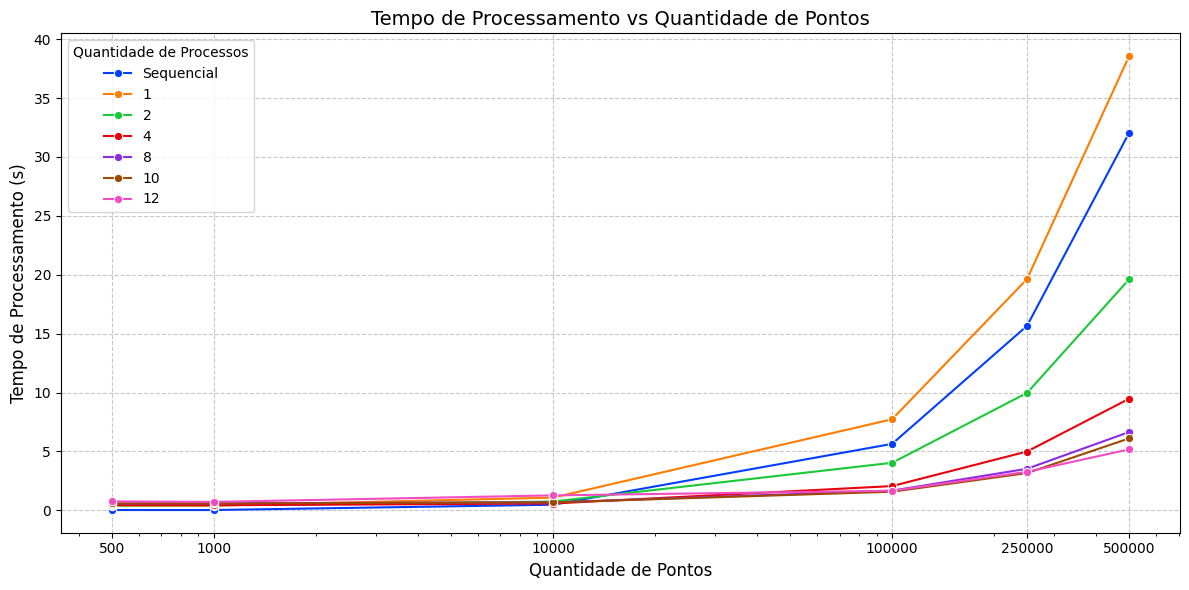

In [197]:
# Resetar índice para facilitar o uso no gráfico
df_plot = df_medias.reset_index()

# Substituir "Quantidade de Processos" = 0 por "Sequencial" na legenda
df_plot['Quantidade de Processos'] = df_plot['Quantidade de Processos'].replace(0, 'Sequencial')

# Obter as quantidades de pontos únicas presentes no dataframe
quantidades_de_pontos = sorted(df_plot['Quantidade de Pontos'].unique())

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_plot,
    x='Quantidade de Pontos',  # Quantidade de Pontos no eixo X
    y='Tempo de Processamento',  # Tempo de Processamento no eixo Y
    hue='Quantidade de Processos',  # Linhas por Quantidade de Processos
    marker='o',
    palette="bright"
)

# Configurações do gráfico
plt.title('Tempo de Processamento vs Quantidade de Pontos', fontsize=14)
plt.xlabel('Quantidade de Pontos', fontsize=12)
plt.ylabel('Tempo de Processamento (s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Definir escala logarítmica para o eixo X
plt.xscale('log')

# Ajustar os valores de Quantidade de Pontos no eixo X
plt.xticks(quantidades_de_pontos, labels=quantidades_de_pontos)

# Legenda e ajustes finais
plt.legend(title='Quantidade de Processos', fontsize=10)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Aceleração

In [198]:
# Função para calcular a aceleração
def calc_aceleracao(row):
    dim = row.name[1]
    return df_medias.loc[0, dim]["Tempo de Processamento"] / row["Tempo de Processamento"]

# Aplicar a função de aceleração para todas as combinações de Threads e Dim (exceto sequencial)
df_medias['Aceleracao'] = df_medias.apply(calc_aceleracao, axis=1)

In [199]:
df_medias

Tempo de Processamento  \
Quantidade de Processos Quantidade de Pontos                           
0                       500                                  0.02330   
                        1000                                 0.02301   
                        10000                                0.47335   
                        100000                               5.63880   
                        250000                              15.65942   
                        500000                              32.05164   
1                       500                                  0.38434   
                        1000                                 0.40618   
                        10000                                1.07420   
                        100000                               7.72796   
                        250000                              19.63408   
                        500000                              38.57010   
2                       500                                  0.41522   
                        1000                                 0.42638   
                        10000                                0.74157   
                        100000                               4.03389   
                        250000                               9.96660   
                        500000                              19.61494   
4                       500                                  0.45303   
                        1000                                 0.42655   
                        10000                                0.57576   
                        100000                               2.05570   
                        250000                               4.99173   
                        500000                               9.47116   
8                       500                                  0.57561   
                        1000                                 0.60047   
                        10000                                0.67182   
                        100000                               1.66410   
                        250000                               3.52554   
                        500000                               6.64558   
10                      500                                  0.58062   
                        1000                                 0.58196   
                        10000                                0.66924   
                        100000                               1.57719   
                        250000                               3.16099   
                        500000                               6.10404   
12                      500                                  0.75541   
                        1000                                 0.71306   
                        10000                                1.26583   
                        100000                               1.65944   
                        250000                               3.26898   
                        500000                               5.17179   

                                              Aceleracao  
Quantidade de Processos Quantidade de Pontos              
0                       500                     1.000000  
                        1000                    1.000000  
                        10000                   1.000000  
                        100000                  1.000000  
                        250000                  1.000000  
                        500000                  1.000000  
1                       500                     0.060623  
                        1000                    0.056650  
                        10000                   0.440654  
                        100000                  0.729662  
                        250000                  0.797563  
                        500000                  0.830997  
2                       500                     0.0

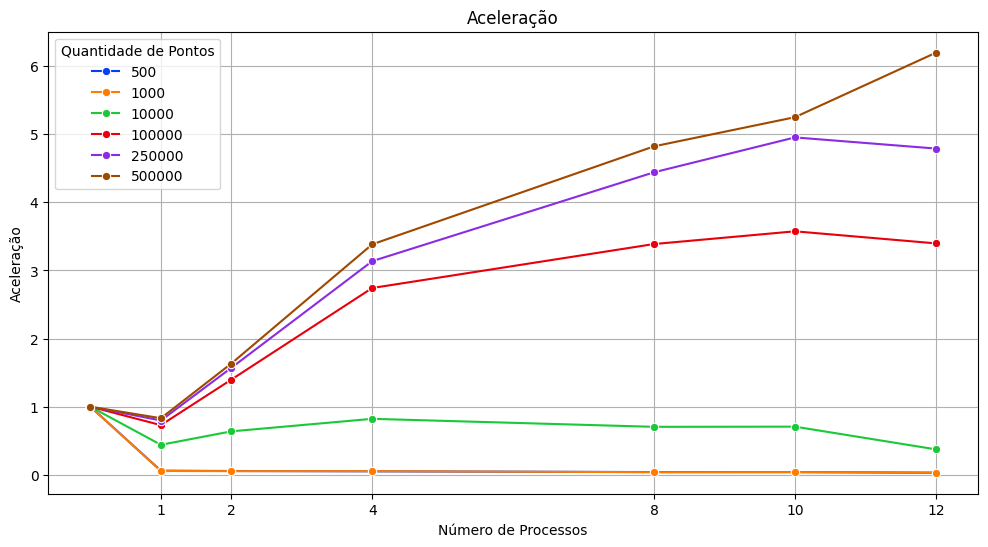

In [200]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de Processos', y='Aceleracao', hue='Quantidade de Pontos', marker='o', palette="bright")

# Configurações do gráfico
plt.title('Aceleração')
plt.xlabel('Número de Processos')
plt.ylabel('Aceleração')
plt.grid(True)
plt.xticks([1, 2, 4, 8, 10, 12])
plt.show()

### Eficiência

In [201]:
# Função para calcular a eficiência
def calc_efic(row):
    th = row.name[0]
    if th == 0:
        return 1
    return row["Aceleracao"] / th

In [202]:
# Aplicar a função de eficiência
df_medias['Eficiencia'] = df_medias.apply(calc_efic, axis=1)

In [203]:
df_medias

Tempo de Processamento  \
Quantidade de Processos Quantidade de Pontos                           
0                       500                                  0.02330   
                        1000                                 0.02301   
                        10000                                0.47335   
                        100000                               5.63880   
                        250000                              15.65942   
                        500000                              32.05164   
1                       500                                  0.38434   
                        1000                                 0.40618   
                        10000                                1.07420   
                        100000                               7.72796   
                        250000                              19.63408   
                        500000                              38.57010   
2                       500                                  0.41522   
                        1000                                 0.42638   
                        10000                                0.74157   
                        100000                               4.03389   
                        250000                               9.96660   
                        500000                              19.61494   
4                       500                                  0.45303   
                        1000                                 0.42655   
                        10000                                0.57576   
                        100000                               2.05570   
                        250000                               4.99173   
                        500000                               9.47116   
8                       500                                  0.57561   
                        1000                                 0.60047   
                        10000                                0.67182   
                        100000                               1.66410   
                        250000                               3.52554   
                        500000                               6.64558   
10                      500                                  0.58062   
                        1000                                 0.58196   
                        10000                                0.66924   
                        100000                               1.57719   
                        250000                               3.16099   
                        500000                               6.10404   
12                      500                                  0.75541   
                        1000                                 0.71306   
                        10000                                1.26583   
                        100000                               1.65944   
                        250000                               3.26898   
                        500000                               5.17179   

                                              Aceleracao  Eficiencia  
Quantidade de Processos Quantidade de Pontos                          
0                       500                     1.000000    1.000000  
                        1000                    1.000000    1.000000  
                        10000                   1.000000    1.000000  
                        100000                  1.000000    1.000000  
                        250000                  1.000000    1.000000  
                        500000                  1.000000    1.000000  
1                       500                     0.060623    0.060623  
                        1000                    0.056650    0.056650  
                        10000                   0.440654    0.440654  
                        100000                  0.729662    0.729662  
                        2

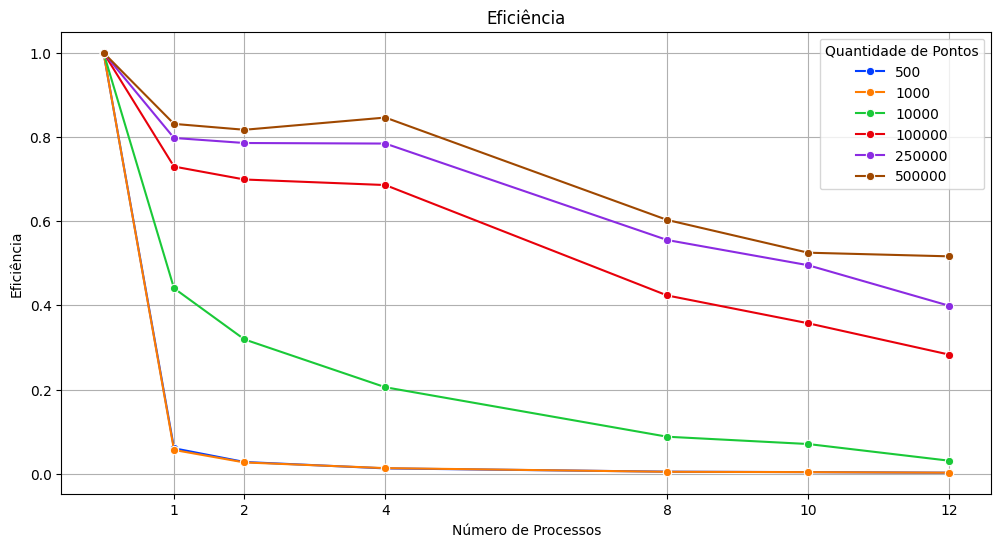

In [204]:
# Criar o gráfico de linhas com o Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de Processos', y='Eficiencia', hue='Quantidade de Pontos', marker='o', palette="bright")

# Configurações do gráfico
plt.title('Eficiência')
plt.xlabel('Número de Processos')
plt.ylabel('Eficiência')
plt.grid(True)
plt.xticks([1, 2, 4, 8, 10, 12])
plt.show()

In [205]:
# Remover a linha onde Quantidade de Processos é 0
df_medias_filtrado = df_medias.loc[df_medias.index.get_level_values('Quantidade de Processos') != 0]

# Criar tabela pivotada para os ganhos de aceleração
tabela_aceleracao = df_medias_filtrado.reset_index().pivot(
    index='Quantidade de Processos',
    columns='Quantidade de Pontos',
    values='Aceleracao'
)

# Tabelas

In [206]:
# Exibir a tabela
tabela_aceleracao

Quantidade de Pontos,500,1000,10000,100000,250000,500000
Quantidade de Processos,,,,,,
1,0.060623,0.056650,0.440654,0.729662,0.797563,0.830997
2,0.056115,0.053966,0.638308,1.397857,1.571190,1.634042
4,0.051431,0.053944,0.822131,2.743007,3.137073,3.384130
8,0.040479,0.038320,0.704579,3.388498,4.441708,4.823001
10,0.040130,0.039539,0.707295,3.575219,4.953961,5.250890
12,0.030844,0.032269,0.373944,3.398014,4.790308,6.197398


In [207]:
# Criar tabela pivotada para ganhos com eficiência
tabela_eficiencia = df_medias_filtrado.reset_index().pivot(
    index='Quantidade de Processos',
    columns='Quantidade de Pontos',
    values='Eficiencia'
)

In [208]:
tabela_eficiencia

Quantidade de Pontos,500,1000,10000,100000,250000,500000
Quantidade de Processos,,,,,,
1,0.060623,0.056650,0.440654,0.729662,0.797563,0.830997
2,0.028057,0.026983,0.319154,0.698928,0.785595,0.817021
4,0.012858,0.013486,0.205533,0.685752,0.784268,0.846033
8,0.005060,0.004790,0.088072,0.423562,0.555214,0.602875
10,0.004013,0.003954,0.070729,0.357522,0.495396,0.525089
12,0.002570,0.002689,0.031162,0.283168,0.399192,0.516450


In [209]:
# Criar uma cópia da tabela
df_medias_copy = df_medias.copy().reset_index()

tabela_tempos_proc_copy = df_medias_copy.pivot(
    index='Quantidade de Processos',
    columns='Quantidade de Pontos',
    values='Tempo de Processamento'
)

# Substituindo o valor 0 por "Sequencial" na cópia
tabela_tempos_proc_copy.index = tabela_tempos_proc_copy.index.map(lambda x: 'Sequencial' if x == 0 else x)

tabela_tempos_proc_copy

Quantidade de Pontos,500,1000,10000,100000,250000,500000
Quantidade de Processos,,,,,,
Sequencial,0.02330,0.02301,0.47335,5.63880,15.65942,32.05164
1,0.38434,0.40618,1.07420,7.72796,19.63408,38.57010
2,0.41522,0.42638,0.74157,4.03389,9.96660,19.61494
4,0.45303,0.42655,0.57576,2.05570,4.99173,9.47116
8,0.57561,0.60047,0.67182,1.66410,3.52554,6.64558
10,0.58062,0.58196,0.66924,1.57719,3.16099,6.10404
12,0.75541,0.71306,1.26583,1.65944,3.26898,5.17179
